In [19]:
# %matplotlib widget
from because.probability import prob

from because.synth import read_data
from because.visualization import viz

r = read_data.Reader('/home/arun/HPCC-covid19/LLCP/llcpA.csv')
ds = r.read()

ps = prob.ProbSpace(ds)

getData:  290759 records read.


# Question: Charactersitics of a person and their effect on Diabetes?

Related variables: Diabetes, Age, Height, Weight, BMI, Income, Physical Activity, Employment

# Step 1: Examining the individual variables.

Viz.show: Target =  [('diabetes',), ('age',)] , Condition =  []
Viz.show: Showing graph =  Multi Variable PDF Plot , power =  1
vars =  ['diabetes', 'age']


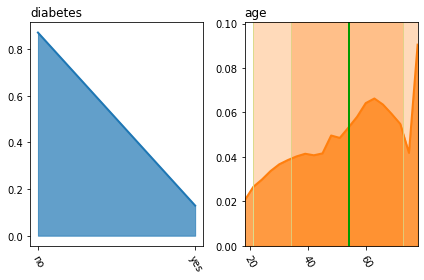

Viz.show: Target =  [('height',), ('weight',)] , Condition =  []
Viz.show: Showing graph =  Multi Variable PDF Plot , power =  1
vars =  ['height', 'weight']


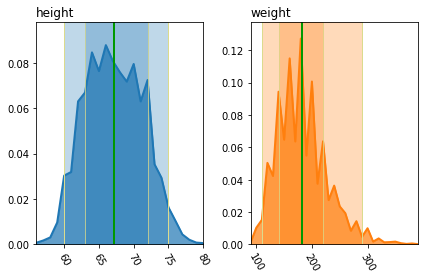

Viz.show: Target =  [('bmi',), ('income',)] , Condition =  []
Viz.show: Showing graph =  Multi Variable PDF Plot , power =  1
vars =  ['bmi', 'income']


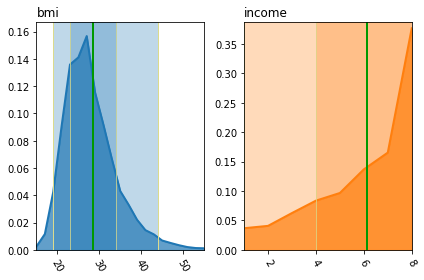

Viz.show: Target =  [('employment',), ('physicalactivity',)] , Condition =  []
Viz.show: Showing graph =  Multi Variable PDF Plot , power =  1
vars =  ['employment', 'physicalactivity']


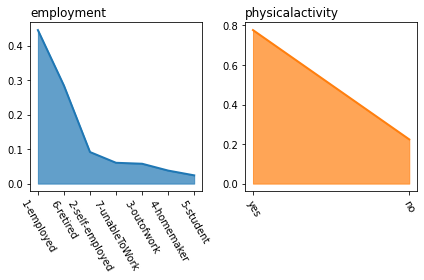

In [2]:
viz.show(probspace=ps, targetSpec=[('diabetes'),('age')], condSpec=[], gtype='multi')
viz.show(probspace=ps, targetSpec=[('height'),('weight')], condSpec=[], gtype='multi')
viz.show(probspace=ps, targetSpec=[('bmi'), ('income')], condSpec=[], gtype='multi')
viz.show(probspace=ps, targetSpec=[('employment'), ('physicalactivity')], condSpec=[], gtype='multi')

Step 2: Examining the relationship between the variables.

In [2]:
pwd

'/home/arun/HPCC-covid19/LLCP'

In [9]:
import pandas as pd
df=pd.read_csv('llcpA.csv')
df.shape

(290759, 32)

In [18]:
# df['drinks'].describe()
df.drinks.value_counts().sort_index()

0.0     135919
1.0      21416
2.0      16822
3.0       9574
4.0      20732
5.0       8256
6.0       3067
7.0       2170
8.0      13031
9.0        201
10.0      6691
11.0        48
12.0      8959
13.0        81
14.0       491
15.0      5620
16.0      3906
17.0        84
18.0       201
19.0         9
20.0      9471
21.0       167
22.0       148
23.0        73
24.0      1403
25.0      2574
26.0       145
27.0       216
28.0      6321
29.0       280
30.0     12683
Name: drinks, dtype: int64

In [17]:
q[0]

12683

Viz.show: Target =  [('diabetes', 'yes')] , Condition =  [('drinks',)]
Viz.show: Showing graph =  2D Bound Probability plot with 1 conditional. , power =  None
Dimensions =  2 .  Conditionals =  1
Number of points to test for each conditional =  35
Test Time =  0.0


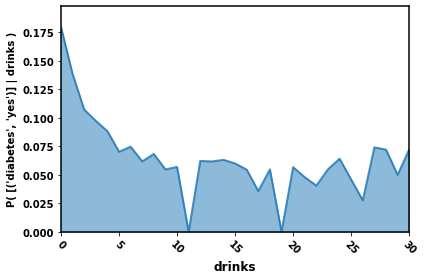

In [25]:
viz.show(probspace=ps, targetSpec=[('diabetes','yes')], condSpec=['drinks'], gtype='pdf')

In [39]:
df.smokertype.value_counts().sort_index()

1-everyday        30510
2-occassional     11333
3-former          81235
4-never          167681
Name: smokertype, dtype: int64

Viz.show: Target =  [('othercancer', 'yes')] , Condition =  [('smokertype',)]
Viz.show: Showing graph =  2D Bound Probability plot with 1 conditional. , power =  None
Dimensions =  2 .  Conditionals =  1
Number of points to test for each conditional =  35
Test Time =  0.0


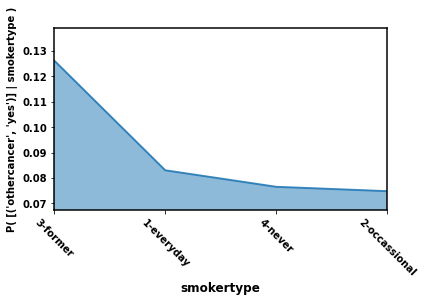

6.146929610465684
6.5330091709238625


'4-never'

In [36]:

viz.show(probspace=ps, targetSpec=[('othercancer', 'yes')], condSpec=['smokertype'], gtype='pdf')
print(ps.E(['drinks'], [(('smokertype', '3-former')), ('othercancer', 'yes')])) #6
print(ps.E(['drinks'], [(('smokertype', '3-former'))])) #6

ps.E(['smokertype'], [(('drinks', 0)), ('diabetes', 'yes')]) #6

Viz.show: Target =  [('diabetes', 'yes')] , Condition =  [('smokertype',), ('drinks',)]
Viz.show: Showing graph =  3D Bound Probability plot with 2 conditionals. , power =  None
enhance =  False
nTests =  124
Test Time =  0.001
String Value Mappings:
     smokertype: 1-everyday=1, 2-occassional=2, 3-former=3, 4-never=4



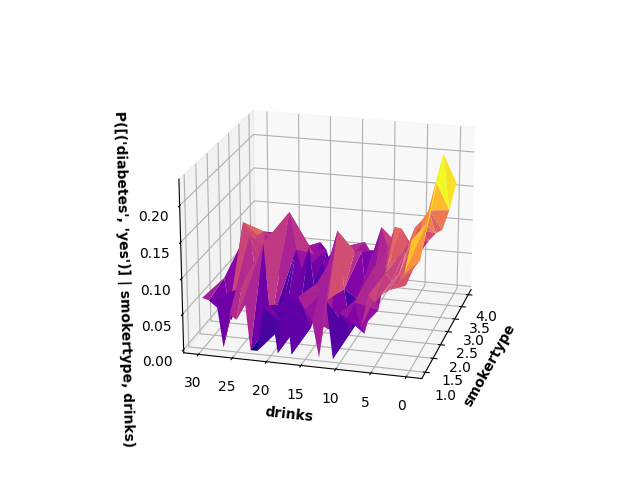

Unhandled message type set_device_pixel_ratio. {'device_pixel_ratio': 0.8333333134651184, 'type': 'set_device_pixel_ratio'}


In [40]:
%matplotlib widget
viz.show(probspace=ps, targetSpec=[('diabetes','yes')], condSpec=['smokertype', 'drinks'], gtype='pdf')

In [45]:
print(ps.E(['weight'], [('drinks', 0)]), ps.E(['weight'], [('drinks', 0), ('diabetes', 'yes')])) 
print(ps.E(['income'], [('drinks', 0)]), ps.E(['income'], [('drinks', 0), ('diabetes', 'yes')])) 

182.99538695840906 200.8989407386201
5.590601755457294 5.063719275285265


Viz.show: Target =  [('diabetes', 'yes')] , Condition =  [('sleephours',)]
Viz.show: Showing graph =  2D Bound Probability plot with 1 conditional. , power =  None
Dimensions =  2 .  Conditionals =  1
Number of points to test for each conditional =  35
Test Time =  5.004


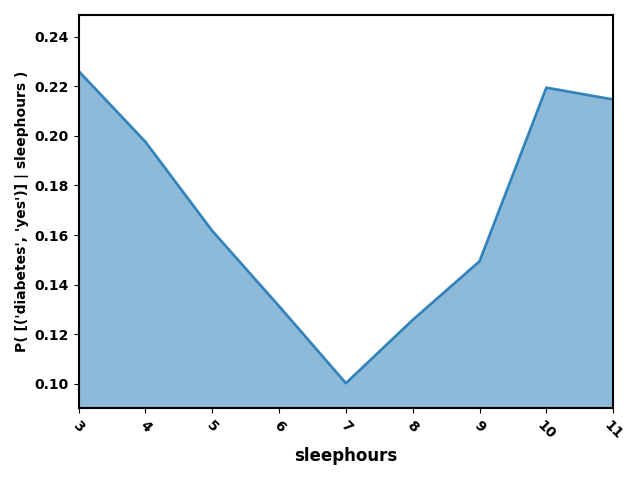

In [46]:
viz.show(probspace=ps, targetSpec=[('diabetes','yes')], condSpec=['sleephours'], gtype='pdf')

Viz.show: Target =  [('drinks',)] , Condition =  [('sleephours',)]
Viz.show: Showing graph =  2D Expected value plot with single condition , power =  None
Dimensions =  2 .  Conditionals =  1
Number of points to test for each conditional =  50
Elapsed Time =  9.293


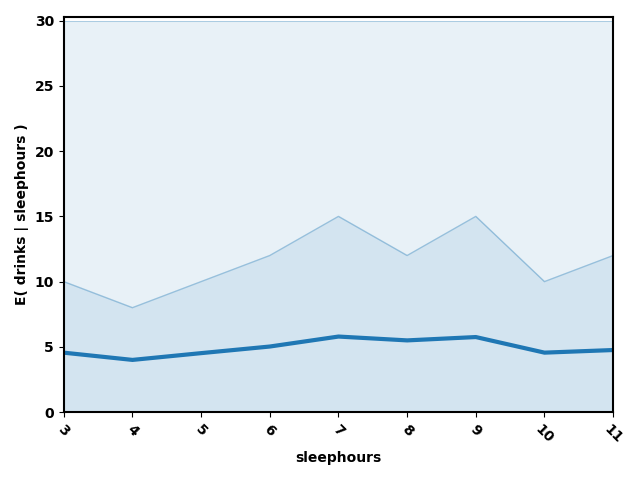

In [48]:
viz.show(probspace=ps, targetSpec=[('drinks')], condSpec=['sleephours'], gtype='exp')

In [55]:
for i in ps.getValues('employment'):
    print(i,",", ps.P([('employment', i)], [('drinks', 0)]), ",",ps.P([('diabetes','yes')], [('drinks', 0), ('employment', i)]))

1-employed , 0.362635098845636 , 0.10720444723974923
2-self-employed , 0.07884843178657877 , 0.1035737613138005
3-outofwork , 0.059844466189421644 , 0.14236537988689452
4-homemaker , 0.049720789587916335 , 0.13939035217519977
5-student , 0.024801536209065694 , 0.025215069712251556
6-retired , 0.3322934983335663 , 0.26102070187091775
7-unableToWork , 0.09185617904781525 , 0.3270324389267121


In [56]:
ps.E(['drinks'], [('employment', '5-student')])

3.627600057380577

In [58]:
ps.E(['gender'], [('drinks', 0)])

'female'